In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df = pd.read_csv('6304_Vaganov/lb3/dataset_group.csv',)

In [3]:
df

,2000-01-01,1,yogurt
0,2000-01-01,1,pork
1,2000-01-01,1,sandwich bags
2,2000-01-01,1,lunch meat
3,2000-01-01,1,all- purpose
4,2000-01-01,1,flour
...,...,...,...
22337,2002-02-26,1139,soda
22338,2002-02-26,1139,laundry detergent
22339,2002-02-26,1139,vegetables
22340,2002-02-26,1139,shampoo


In [4]:
unique_id = list(set(df[1]))
print(len(unique_id)) #Выведем количество id

KeyError: 1

In [11]:
items = list(set(df[2]))
print(len(items)) #Выведем количество товаров

38


In [17]:
dataset = [[elem for elem in df[df[1] == id][2] if elem in
items] for id in unique_id]

In [18]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
new_df = pd.DataFrame(te_ary, columns=te.columns_)
new_df

,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,vegetables,waffles,yogurt
0,True,True,False,True,True,False,False,False,True,False,...,True,True,True,False,False,False,False,True,False,True
1,False,True,False,False,False,True,True,False,False,True,...,True,False,False,False,False,True,True,True,True,True
2,False,False,True,False,False,True,True,False,True,False,...,True,True,True,True,False,True,False,True,False,False
3,True,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
4,True,False,False,False,False,False,False,False,True,False,...,False,False,True,True,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,True,False,False,True,False,True,True,True,True,True,...,True,True,False,False,True,False,False,False,False,False
1135,False,False,False,False,False,True,True,True,True,True,...,False,True,False,True,False,False,False,True,False,False
1136,False,False,True,True,False,False,False,False,True,True,...,True,True,False,False,True,False,True,True,False,True
1137,True,False,False,True,False,False,True,False,False,False,...,False,True,True,True,True,True,False,True,True,True


In [20]:
from mlxtend.frequent_patterns import apriori
results = apriori(new_df, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x)) 
#добавление размера набора
print(results)

     support                                    itemsets  length
0   0.374890                              (all- purpose)       1
1   0.384548                             (aluminum foil)       1
2   0.385426                                    (bagels)       1
3   0.374890                                      (beef)       1
4   0.367867                                    (butter)       1
5   0.395961                                   (cereals)       1
6   0.390694                                   (cheeses)       1
7   0.379280                                (coffee/tea)       1
8   0.388938                              (dinner rolls)       1
9   0.388060              (dishwashing liquid/detergent)       1
10  0.389816                                      (eggs)       1
11  0.352941                                     (flour)       1
12  0.370500                                    (fruits)       1
13  0.345917                                 (hand soap)       1
14  0.398595             

In [22]:
results = apriori(new_df, min_support=0.3, use_colnames=True, max_len=1)
print(results)

     support                        itemsets
0   0.374890                  (all- purpose)
1   0.384548                 (aluminum foil)
2   0.385426                        (bagels)
3   0.374890                          (beef)
4   0.367867                        (butter)
5   0.395961                       (cereals)
6   0.390694                       (cheeses)
7   0.379280                    (coffee/tea)
8   0.388938                  (dinner rolls)
9   0.388060  (dishwashing liquid/detergent)
10  0.389816                          (eggs)
11  0.352941                         (flour)
12  0.370500                        (fruits)
13  0.345917                     (hand soap)
14  0.398595                     (ice cream)
15  0.375768              (individual meals)
16  0.376646                         (juice)
17  0.371378                       (ketchup)
18  0.378402             (laundry detergent)
19  0.395083                    (lunch meat)
20  0.380158                          (milk)
21  0.3757

In [23]:
results = apriori(new_df, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x))
results = results[results['length'] == 2]
print(results)
print('\nCount of result itemstes = ',len(results))

     support                                    itemsets  length
38  0.310799                 (vegetables, aluminum foil)       2
39  0.300263                        (bagels, vegetables)       2
40  0.310799                       (vegetables, cereals)       2
41  0.309043                       (cheeses, vegetables)       2
42  0.308165                  (vegetables, dinner rolls)       2
43  0.306409  (vegetables, dishwashing liquid/detergent)       2
44  0.326602                          (eggs, vegetables)       2
45  0.302897                     (ice cream, vegetables)       2
46  0.309043             (vegetables, laundry detergent)       2
47  0.311677                    (vegetables, lunch meat)       2
48  0.331870                       (vegetables, poultry)       2
49  0.305531                          (soda, vegetables)       2
50  0.315189                       (vegetables, waffles)       2
51  0.319579                        (vegetables, yogurt)       2

Count of result itemstes

In [70]:
support_df = pd.DataFrame(columns=['count', 'support', 'limit_value'])
i = 0
max_length = -1
for support in np.arange(0.05, 0.44, 0.01):
    results = apriori(new_df, min_support=support, use_colnames=True)
    results['length'] = results['itemsets'].apply(lambda x: len(x))
    print('\nCount of result itemsets = {}, with min_support = {}'.format(len(results), support))
    support_df.loc[i] = [len(results), support, 0]
    if max_length <= 0:
        max_length = results['length'].max()
    if max_length not in set(results['length']):
        support_df.loc[i] = [len(results), support, max_length]
        print('no more {} for support {}'.format(max_length, support))
        max_length = -1
    i += 1


Count of result itemsets = 15749, with min_support = 0.05

Count of result itemsets = 10482, with min_support = 0.060000000000000005

Count of result itemsets = 4796, with min_support = 0.07

Count of result itemsets = 1836, with min_support = 0.08000000000000002

Count of result itemsets = 1426, with min_support = 0.09000000000000001
no more 4 for support 0.09000000000000001

Count of result itemsets = 1406, with min_support = 0.1

Count of result itemsets = 1383, with min_support = 0.11000000000000001

Count of result itemsets = 1251, with min_support = 0.12000000000000001

Count of result itemsets = 1004, with min_support = 0.13

Count of result itemsets = 767, with min_support = 0.14

Count of result itemsets = 556, with min_support = 0.15000000000000002

Count of result itemsets = 289, with min_support = 0.16000000000000003

Count of result itemsets = 140, with min_support = 0.17000000000000004
no more 3 for support 0.17000000000000004

Count of result itemsets = 85, with min_sup

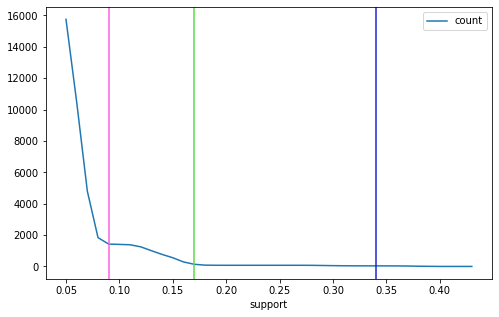

In [101]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(8,5))
support_df.plot(x='support', y='count', ax=ax)
for support_limit_value in support_df[support_df['limit_value']>0]['support'].values:
    plt.axvline(x=support_limit_value, color=np.random.rand(3,))


In [120]:
results = apriori(new_df, min_support=0.38, use_colnames=True, max_len=1)
new_items = [ list(elem)[0] for elem in results['itemsets']]
new_dataset = [[elem for elem in df[df[1] == id][2] if elem in new_items] for id in unique_id]
results

KeyError: 1

In [113]:
te = TransactionEncoder()
te_ary = te.fit(new_dataset).transform(new_dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [115]:
results = apriori(df, min_support=0.3, use_colnames=True)
results

,support,itemsets
0,0.384548,(aluminum foil)
1,0.385426,(bagels)
2,0.395961,(cereals)
3,0.390694,(cheeses)
4,0.388938,(dinner rolls)
5,0.388060,(dishwashing liquid/detergent)
6,0.389816,(eggs)
7,0.398595,(ice cream)
8,0.395083,(lunch meat)
9,0.380158,(milk)
